# Import"

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

###Set up github

In [21]:
!git init

Initialized empty Git repository in /content/drive/MyDrive/INTERN/SATRIA DATA/.git/


In [23]:
!git config --global user.email "rhmftn.ni@gmail.com"
!git config --global user.name "rahmafatin"

In [24]:
!git commit -m "checking the null value"

On branch master

Initial commit

Untracked files:
	Instruksi dan Problem BDC Satria Data 2022.pptx
	Kode ICD10 untuk diagnosis FKTP.xlsx
	Metadata.xlsx
	model.ipynb
	submission.csv
	test_fktp.txt
	train_fktp.txt

nothing added to commit but untracked files present


# Preprocessing

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd 'drive/MyDrive/INTERN/SATRIA DATA'
# %pwd


Mounted at /content/drive
/content/drive/MyDrive/INTERN/SATRIA DATA


'/content/drive/MyDrive/INTERN/SATRIA DATA'

In [8]:
cols = [
    'nomor_peserta', 
    'nomor_keluarga', 
    'bobot', 
    'id_kunjungan_fktp', 
    'tgl_dtg_kunjungan_fktp', 
    'tgl_plg_kunjungan_fktp', 
    'provinsi_fktp', 
    'kota_fktp', 
    'kepemilikan_fktp', 
    'jenis_fktp', 
    'tipe_fktp', 
    'tingkat_pelayanan_fktp', 
    'jenis_poli_fktp', 
    'akses_layanan_fktp', 
    'kode_nama_diagnosis', 
    'kode_diagnosis', 
    'kode_diagnosis_2', 
    'nama_diagnosis', 
    'provinsi_rujukan', 
    'kota_rujukan', 
    'kepemilikan_faskes_rujukan', 
    'jenis_faskes_rujukan', 
    'tipe_faskes_rujukan', 
    'poli_faskes_rujukan', 
    'jenis_kunjungan_fktp', 
    'status_pulang',
]

In [9]:
df_train = pd.read_csv("train_fktp.txt", sep=',', header=None, names=cols)
df_train.head()

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp,status_pulang
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,Sehat
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,Belum_Sehat
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,Belum_Sehat
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,Belum_Sehat


In [15]:
#Checking the null value distribution 
df_train.isna().sum()


nomor_peserta                       0
nomor_keluarga                      0
bobot                               0
id_kunjungan_fktp                   0
tgl_dtg_kunjungan_fktp              0
tgl_plg_kunjungan_fktp              0
provinsi_fktp                       0
kota_fktp                           0
kepemilikan_fktp                    0
jenis_fktp                          0
tipe_fktp                           0
tingkat_pelayanan_fktp              0
jenis_poli_fktp                     1
akses_layanan_fktp                  0
kode_nama_diagnosis                 0
kode_diagnosis                1380241
kode_diagnosis_2                    0
nama_diagnosis                      0
provinsi_rujukan                    0
kota_rujukan                        0
kepemilikan_faskes_rujukan          0
jenis_faskes_rujukan                0
tipe_faskes_rujukan                 0
poli_faskes_rujukan                 0
jenis_kunjungan_fktp                0
status_pulang                       0
dtype: int64

###Exploratory Data Analysis

###Nama diagnosis dan kode diagnosis

In [19]:
df_train[df_train['kode_diagnosis'].isna() == True][['kode_nama_diagnosis', 'kode_diagnosis_2', 'nama_diagnosis']]

,kode_nama_diagnosis,kode_diagnosis_2,nama_diagnosis
0,9999,9999,9999
6,9999,9999,9999
7,9999,9999,9999
8,9999,9999,9999
10,9999,9999,9999
...,...,...,...
4056890,9999,9999,9999
4056892,9999,9999,9999
4056893,9999,9999,9999
4056895,9999,9999,9999


In [66]:
df_train[df_train['kode_diagnosis'].isna() == True]['kode_diagnosis_2'].unique()

array(['9999'], dtype=object)

In [26]:
kode_nama = pd.DataFrame(df_train[['kode_diagnosis', 'nama_diagnosis']])

In [36]:
kode_nama['nama_diagnosis'].str.split(',').str.get(0).unique()

array(['9999', 'Gastritis', 'Contraceptive management', ...,
       'Intentional self-poisoning by and exposure to nonopioid analgesics',
       'Falling', 'Parageusia'], dtype=object)

In [49]:
kode_nama[kode_nama['nama_diagnosis'].str.contains('Exposure')]['kode_diagnosis'].unique()

array(['X59', 'W49', 'X58', 'X00', 'X31', 'W87', 'W85', 'W89', 'W43',
       'X09', 'W91', 'X39', 'W99', 'W64', 'Z58', 'X04', 'X08', 'X06'],
      dtype=object)

Melihat persebaran data untuk mencegah persebaran data yang tidak normal. sehingga menyebabkan tidak akuratnya prediksi

In [56]:
df_train['status_pulang'].value_counts()

0    2634511
1    1422387
Name: status_pulang, dtype: int64

Untuk persebaran dari kepulangan pasien cukup seimbang. tetapi jika ditilik kembali terdapat angka yang cukup besar untuk null value di kolom kode_diagnosis

In [57]:
df_train[df_train['kode_diagnosis'].isna() == True]['status_pulang'].value_counts()

1    1380241
Name: status_pulang, dtype: int64

Untuk data yang memiliki nilai kode_diagnosis null berperan besar terhadap kepulangan pasien. Sehingga penghapusan row tidak dapat dilakukan. Alternatif lain adalah melihat poli rujukan dari data dengan diagnosis null

In [63]:
df_train[df_train['kode_diagnosis'].isna() == True]['poli_faskes_rujukan'].value_counts()

98    1380241
Name: poli_faskes_rujukan, dtype: int64

Berdasarkan metadata nilai 98 --> tidak dirujuk. 
Dapat disimpulkan bahwa pasien yang tidak memiliki kode diagnosis tidak mendapatkan rujukan sehingga bisa di klasifikasikan sebagai sembuh. 

Selanjutnya kita bisa melihat poli yang didatangi pasien yang sebagian besar tidak memiliki rujukan dan tidak di diagnosis apapun

In [61]:
df_train[df_train['kode_diagnosis'].isna() == True]['jenis_poli_fktp'].value_counts()

13.0    860554
12.0    499703
28.0     13501
1.0       2077
18.0      1612
17.0      1465
20.0       716
19.0       414
21.0       146
3.0         29
2.0         12
14.0         5
7.0          4
5.0          2
Name: jenis_poli_fktp, dtype: int64

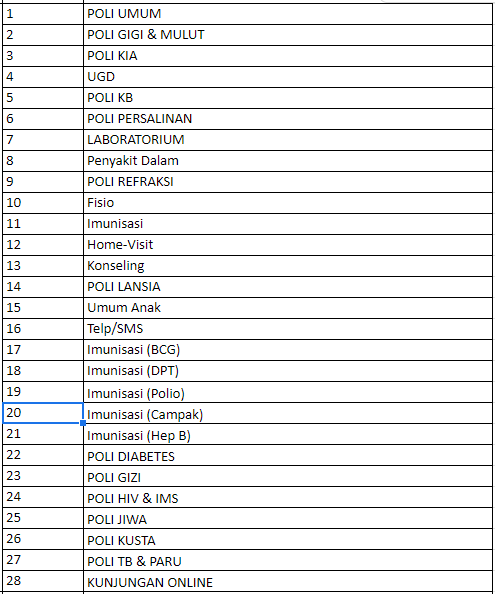


Berdasarkkan metadata menunjukkan bahwa poli - poli yang tidak melakukan rujukan adalah konseling, home visit, Kunjungan online, Poli umum, Imunisasi, Gigi, KIA, Lansia, Laborat dan KB 

Seluruh poli tersebut masuk kedalam poli rawat jalan sehingga tidak membutuhkan konsentrasi lebih lanjut. 

Karena kita tidak bisa menghapus baris yang memiliki null value. maka kita bisa mengisi null value tersebut dengan nilai kode_diagnosis_2 sehingga antara kode_diagnosis dan kode_diagnosis_2 memiliki value yang sama. Hal ini dilakukan karena untuk seluruh data yang memiliki kode_diagnosis null memiliki kode_diagnosis_2 sebesar 999

###Data test

In [10]:
df_test = pd.read_csv("test_fktp.txt", sep=',', header=None, names=cols[:-1])
df_test.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2


In [11]:
label_enc = LabelEncoder()

df_train.status_pulang = label_enc.fit_transform(df_train.status_pulang)
df_train.head()

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp,status_pulang
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,9999,9999,98,9998,98,98,98,98,2,1
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1,0
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1,0
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1,0
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1,0


In [12]:
x_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

x_train

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp
0,157978748.0,50765420,20.064983,958073632,2019-08-01,2019-08-01,61,6108,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
1,95085112.0,26931775,2.626307,449590620P000054,2020-06-17,2020-06-17,51,5171,9,3,...,K29,K297,"Gastritis, unspecified",98,9998,98,98,98,98,1
2,224470578.0,227368233,1.051830,467490619P000001,2019-06-01,2019-06-01,35,3516,9,2,...,Z30,Z309,"Contraceptive management, unspecified",98,9998,98,98,98,98,1
3,63871289.0,62313678,364.741455,254321219Y002368,2019-12-21,2019-12-21,34,3402,3,1,...,I10,I10,Essential (primary) hypertension,98,9998,98,98,98,98,1
4,29915626.0,113446188,1.050523,88681119P000020,2019-11-04,2019-11-04,35,3509,3,1,...,I11,I110,Hypertensive heart disease with (congestive) h...,98,9998,98,98,98,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4056893,212666736.0,91270403,14.246229,1285820875,2020-07-29,2020-07-29,35,3505,9,3,...,NaN,9999,9999,98,9998,98,98,98,98,2
4056894,30859241.0,30859241,3.886934,315641120P000514,2020-11-14,2020-11-14,35,3514,9,2,...,H26,H269,"Cataract, unspecified",35,3514,9,2,14,99,1
4056895,8859416.0,8859416,6.146070,962412926,2019-08-16,2019-08-16,11,1171,4,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
4056896,399491834.0,399491834,26.548826,273170420P000003,2020-04-01,2020-04-01,74,7402,3,1,...,K30,K30,Dyspepsia,98,9998,98,98,98,98,1


In [13]:
x_test = df_test.iloc[:, :]

x_test

,nomor_peserta,nomor_keluarga,bobot,id_kunjungan_fktp,tgl_dtg_kunjungan_fktp,tgl_plg_kunjungan_fktp,provinsi_fktp,kota_fktp,kepemilikan_fktp,jenis_fktp,...,kode_diagnosis,kode_diagnosis_2,nama_diagnosis,provinsi_rujukan,kota_rujukan,kepemilikan_faskes_rujukan,jenis_faskes_rujukan,tipe_faskes_rujukan,poli_faskes_rujukan,jenis_kunjungan_fktp
0,187883292.0,98048784,240.884842,954386050,2019-08-21,2019-08-21,31,3172,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
1,123307139.0,20969999,47.378571,774246805,2019-02-12,2019-02-12,17,1705,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
2,21416273.0,21416273,5.882927,1202010273,2020-03-27,2020-03-27,64,6402,3,1,...,NaN,9999,9999,98,9998,98,98,98,98,2
3,97630052.0,97630052,172.916031,1286640248,2020-07-30,2020-07-30,18,1872,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
4,124531163.0,124531163,187.203140,1285179242,2020-07-28,2020-07-28,18,1809,9,2,...,NaN,9999,9999,98,9998,98,98,98,98,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014220,51801010.0,51801010,7.563763,248870919P000406,2019-09-08,2019-09-08,36,3601,9,2,...,Z99,Z992,Dependence on renal dialysis,36,3602,3,1,27,99,1
1014221,339397889.0,339397889,11.063568,116000620P000034,2020-06-02,2020-06-02,33,3373,9,2,...,Z99,Z999,Dependence on unspecified enabling machine and...,98,9998,98,98,98,98,1
1014222,76213152.0,76213152,286.792694,160421019P000631,2019-10-15,2019-10-15,32,3276,3,1,...,Z99,Z992,Dependence on renal dialysis,32,3276,9,1,33,99,1
1014223,101797983.0,101797983,30.222155,332670919P000083,2019-09-06,2019-09-06,16,1606,3,1,...,Z99,Z992,Dependence on renal dialysis,16,1606,3,1,27,99,1


# Model Benchmark

Example sklearn f1 score
```python
>>> from sklearn.metrics import f1_score
>>> y_true = [0, 1, 2, 0, 1, 2]
>>> y_pred = [0, 2, 1, 0, 0, 1]
>>> f1_score(y_true, y_pred, average='macro')
0.26...
>>> f1_score(y_true, y_pred, average='micro')
0.33...
>>> f1_score(y_true, y_pred, average='weighted')
0.26...
>>> f1_score(y_true, y_pred, average=None)
array([0.8, 0. , 0. ])
>>> y_true = [0, 0, 0, 0, 0, 0]
>>> y_pred = [0, 0, 0, 0, 0, 0]
>>> f1_score(y_true, y_pred, zero_division=1)
1.0...
>>> # multilabel classification
>>> y_true = [[0, 0, 0], [1, 1, 1], [0, 1, 1]]
>>> y_pred = [[0, 0, 0], [1, 1, 1], [1, 1, 0]]
>>> f1_score(y_true, y_pred, average=None)
array([0.66666667, 1.        , 0.66666667])
```

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)
predicted=model.predict(x_test)
# f1_score(y_test, predicted, average='weighted')

ValueError: ignored

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

In [ ]:
model = BernoulliNB()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

In [ ]:
model = SVC()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

In [ ]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(x_train, y_train)  
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)  
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
f1_score(y_test, predicted, average='weighted')

# Export Result to CSV

In [ ]:
# TODO: bikin dataframe dengan cols: No, PSTV01, Predicted
df_result.to_csv('result.csv', encoding='utf-8', index=False)